In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

table = pd.read_csv("Position_Salaries.csv")
X = table['Level'].values
y = table['Salary'].values

#Use of Polynomial features as it converts the a single X value into more than feature which X^0, X^1, X^2.... X^n.
#After this we can use the multiple features as different variable like X^0 -> X0, X^1 -> X1, X^2 -> X2 and then we can perform
#multi-variate regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(4)
X = poly.fit_transform(X.reshape(-1,1))
X_vals = []
for Xs in X:
    X_vals.append(Xs[1])
    
##Required Model for Linear Polynomial regression
model = LinearRegression()
model.fit(X,y)
pred = model.predict(X)

#Predict salary for a specific level which is less than 10
def specific_level(level, model):
    level = np.array([level])
    if level[0]>10:
        print("No one is above the CEO, select values from 1-10")
        return 
    poly = PolynomialFeatures(4)
    level = poly.fit_transform(level.reshape(-1,1))
    return "the Salary for level "+str(level[0][1])+ " is $"+ str(int(model.predict(level)[0])) + " per annum"

level = int(input("Enter level for which you want salary (from 1-10):- "))
specific_level(level,model)

Enter level for which you want salary (from 1-10):- 10


'the Salary for level 10.0 is $988916 per annum'

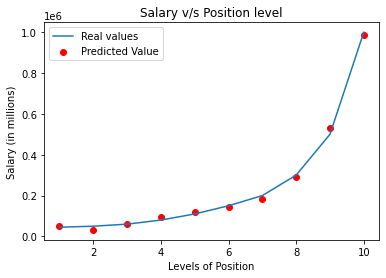

In [153]:
#Visualization 

plt.plot(table['Level'],table['Salary'], label = "Real values")
plt.title("Salary v/s Position level")
plt.xlabel("Levels of Position")
plt.ylabel('Salary (in millions)')
plt.scatter(X_vals, pred , label = "Predicted Value", color = "red")
plt.legend()